<a href="https://colab.research.google.com/github/SharveshSp04/CS-4372---Assignment-2/blob/main/Traffic_Flow_Forecasting_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!
=== UPLOAD TRAFFIC DATASET ===
Please upload your 'traffic_dataset.mat' file when prompted...


Saving traffic_dataset.mat to traffic_dataset.mat
Uploaded file: traffic_dataset.mat
Available variables in the .mat file:
  tra_X_tr: (1, 1261) object
  tra_X_te: (1, 840) object
  tra_Y_tr: (36, 1261) float64
  tra_Y_te: (36, 840) float64
  tra_adj_mat: (36, 36) uint8

Selected variable 'tra_Y_tr' as traffic data
Data shape: (36, 1261)
Data type: float64

✅ Dataset loaded successfully!
Data shape: (36, 1261)

Sample data (first 10 values):
[[0.05091079 0.04764129 0.04483886 0.05978515 0.06258758]
 [0.04624007 0.04950957 0.052312   0.04670715 0.05744979]
 [0.05044372 0.04437179 0.05044372 0.05044372 0.04343765]
 [0.04483886 0.03829986 0.05137786 0.05044372 0.045773  ]
 [0.04483886 0.05324615 0.05651565 0.0490425  0.04156936]]
=== DATA PREPARATION FOR TRAFFIC FLOW FORECASTING ===
Multivariate data with 1261 features detected
Using first feature column. You can modify this to use other columns or aggregates.
Traffic flow data shape: (36,)
Data range: [0.00, 0.14]
Data mean: 0.06, std: 0

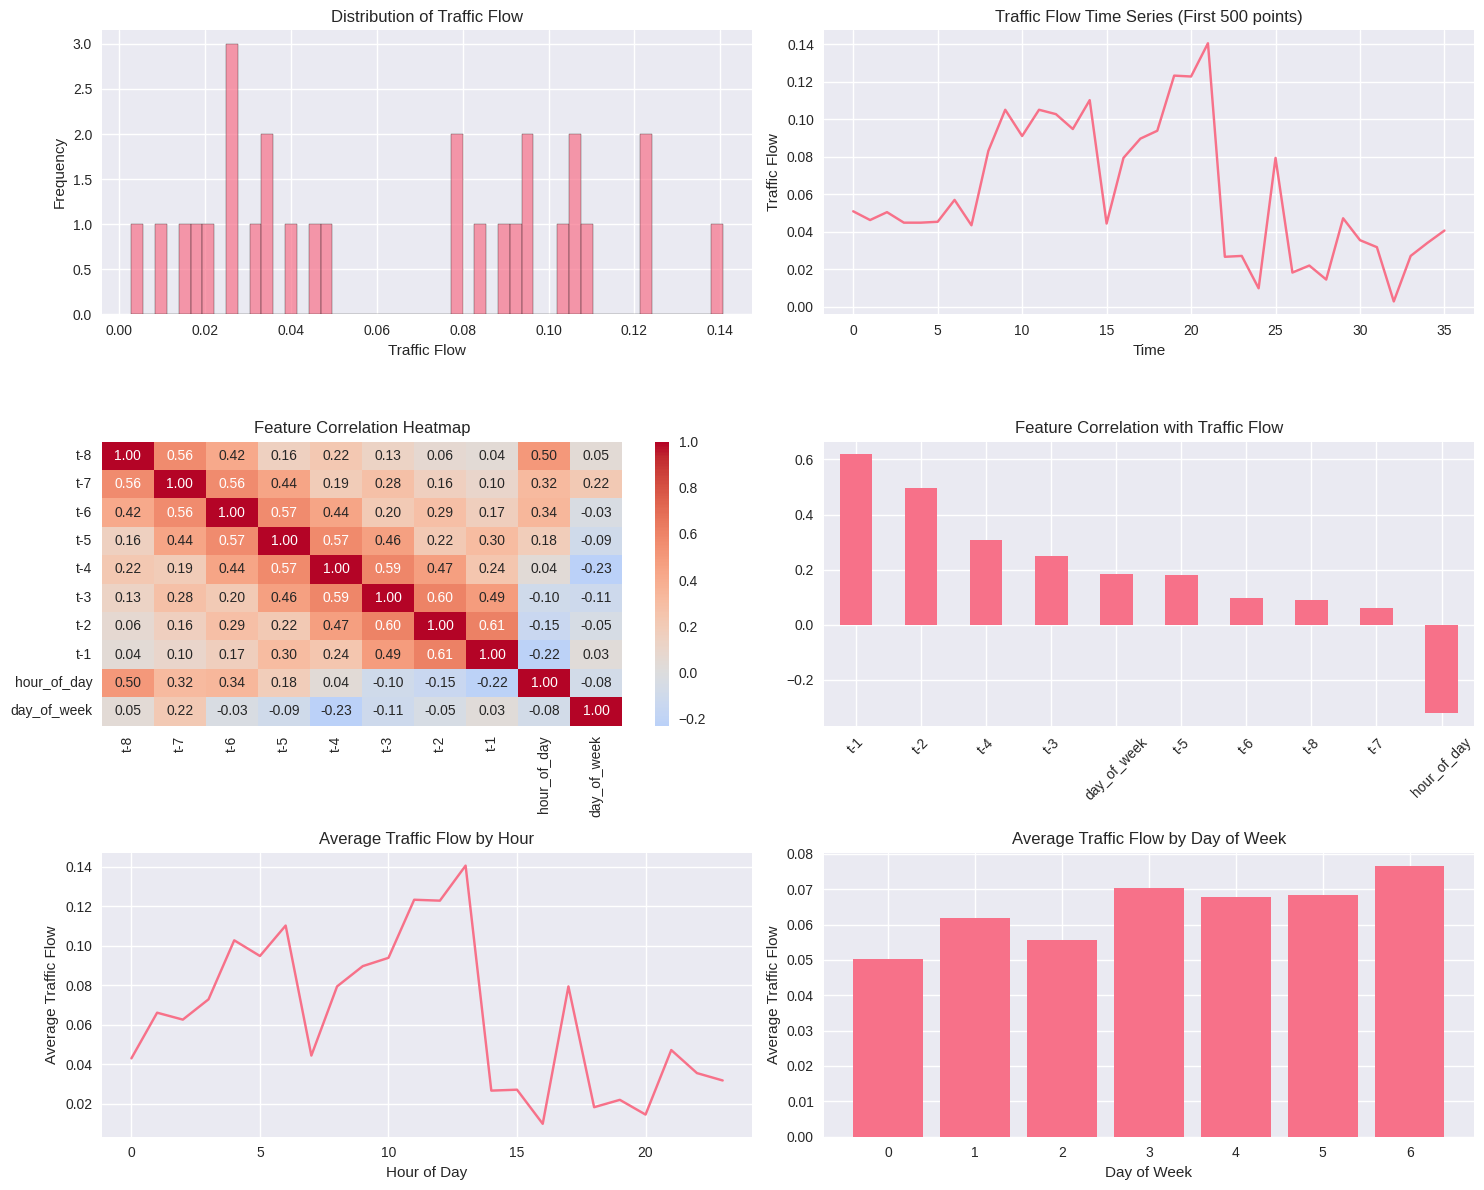


Top features correlated with traffic flow:
t-1            0.618374
t-2            0.494939
t-4            0.309340
t-3            0.251331
day_of_week    0.185345
t-5            0.180664
t-6            0.098646
t-8            0.091653
t-7            0.061337
hour_of_day   -0.318980
Name: traffic_flow, dtype: float64
=== MODEL TRAINING WITH HYPERPARAMETER TUNING ===

=== 1. DECISION TREE REGRESSOR ===
Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score (Negative MSE): -0.6168

=== 2. RANDOM FOREST REGRESSOR ===
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (Negative MSE): -1.2959

=== 3. GRADIENT BOOSTING REGRESSOR ===
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score (Negative MSE): -0.8409

=== 4. 

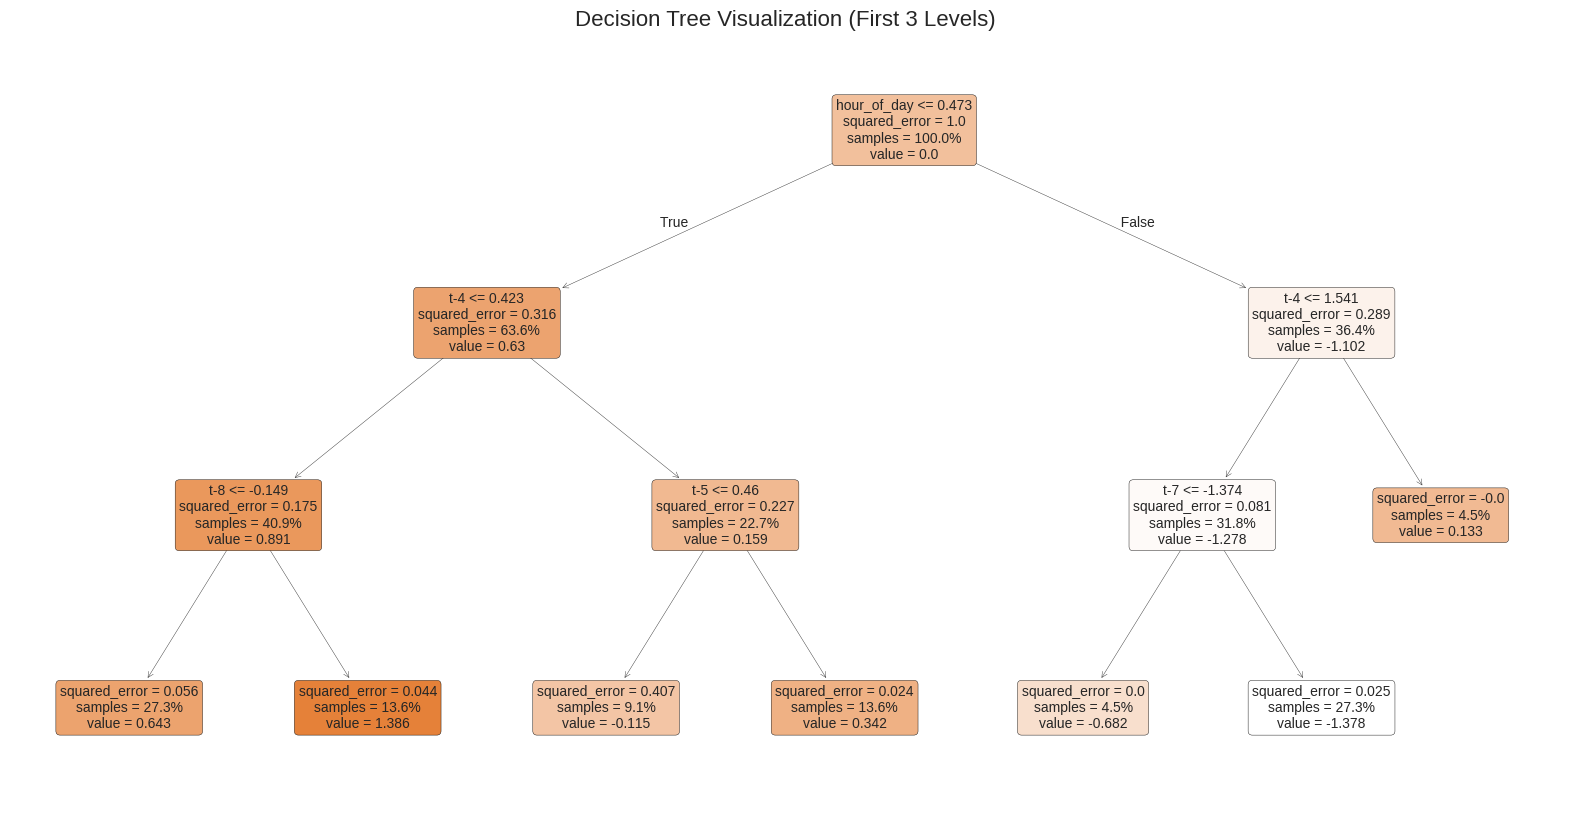

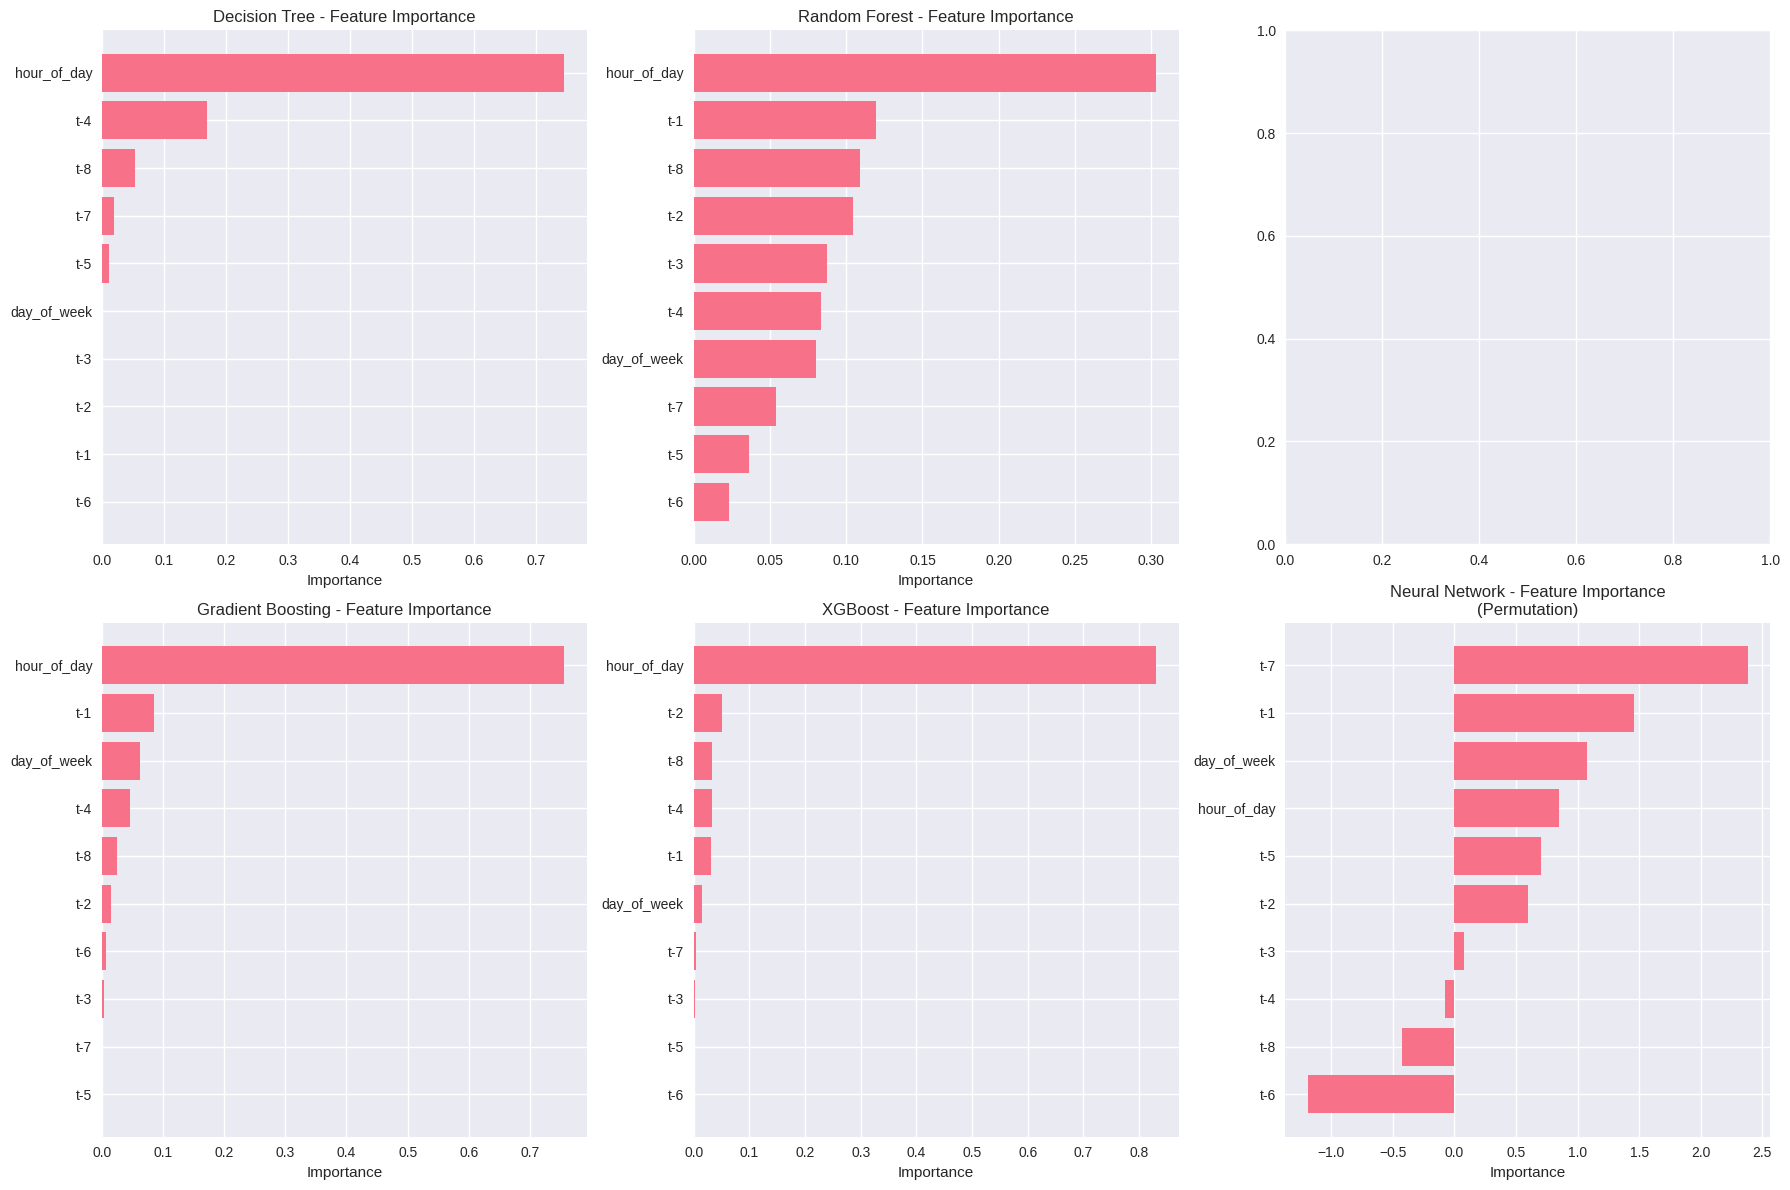


=== TOP FEATURES ACROSS MODELS ===
Decision Tree: t-8, t-4, hour_of_day
Random Forest: t-8, t-1, hour_of_day
Gradient Boosting: day_of_week, t-1, hour_of_day
XGBoost: t-8, t-2, hour_of_day
=== COMPREHENSIVE RESULT ANALYSIS ===

=== PERFORMANCE METRICS COMPARISON ===
               Model     MSE     MAE    RMSE       R²  MAPE (%)
0      Decision Tree  0.0046  0.0583  0.0681 -29.9451    5.8345
1      Random Forest  0.0016  0.0345  0.0400  -9.6746    3.4499
2  Gradient Boosting  0.0032  0.0517  0.0564 -20.2338    5.1707
3            XGBoost  0.0009  0.0232  0.0304  -5.1724    2.3161
4     Neural Network  0.0023  0.0412  0.0483 -14.5208    4.1235


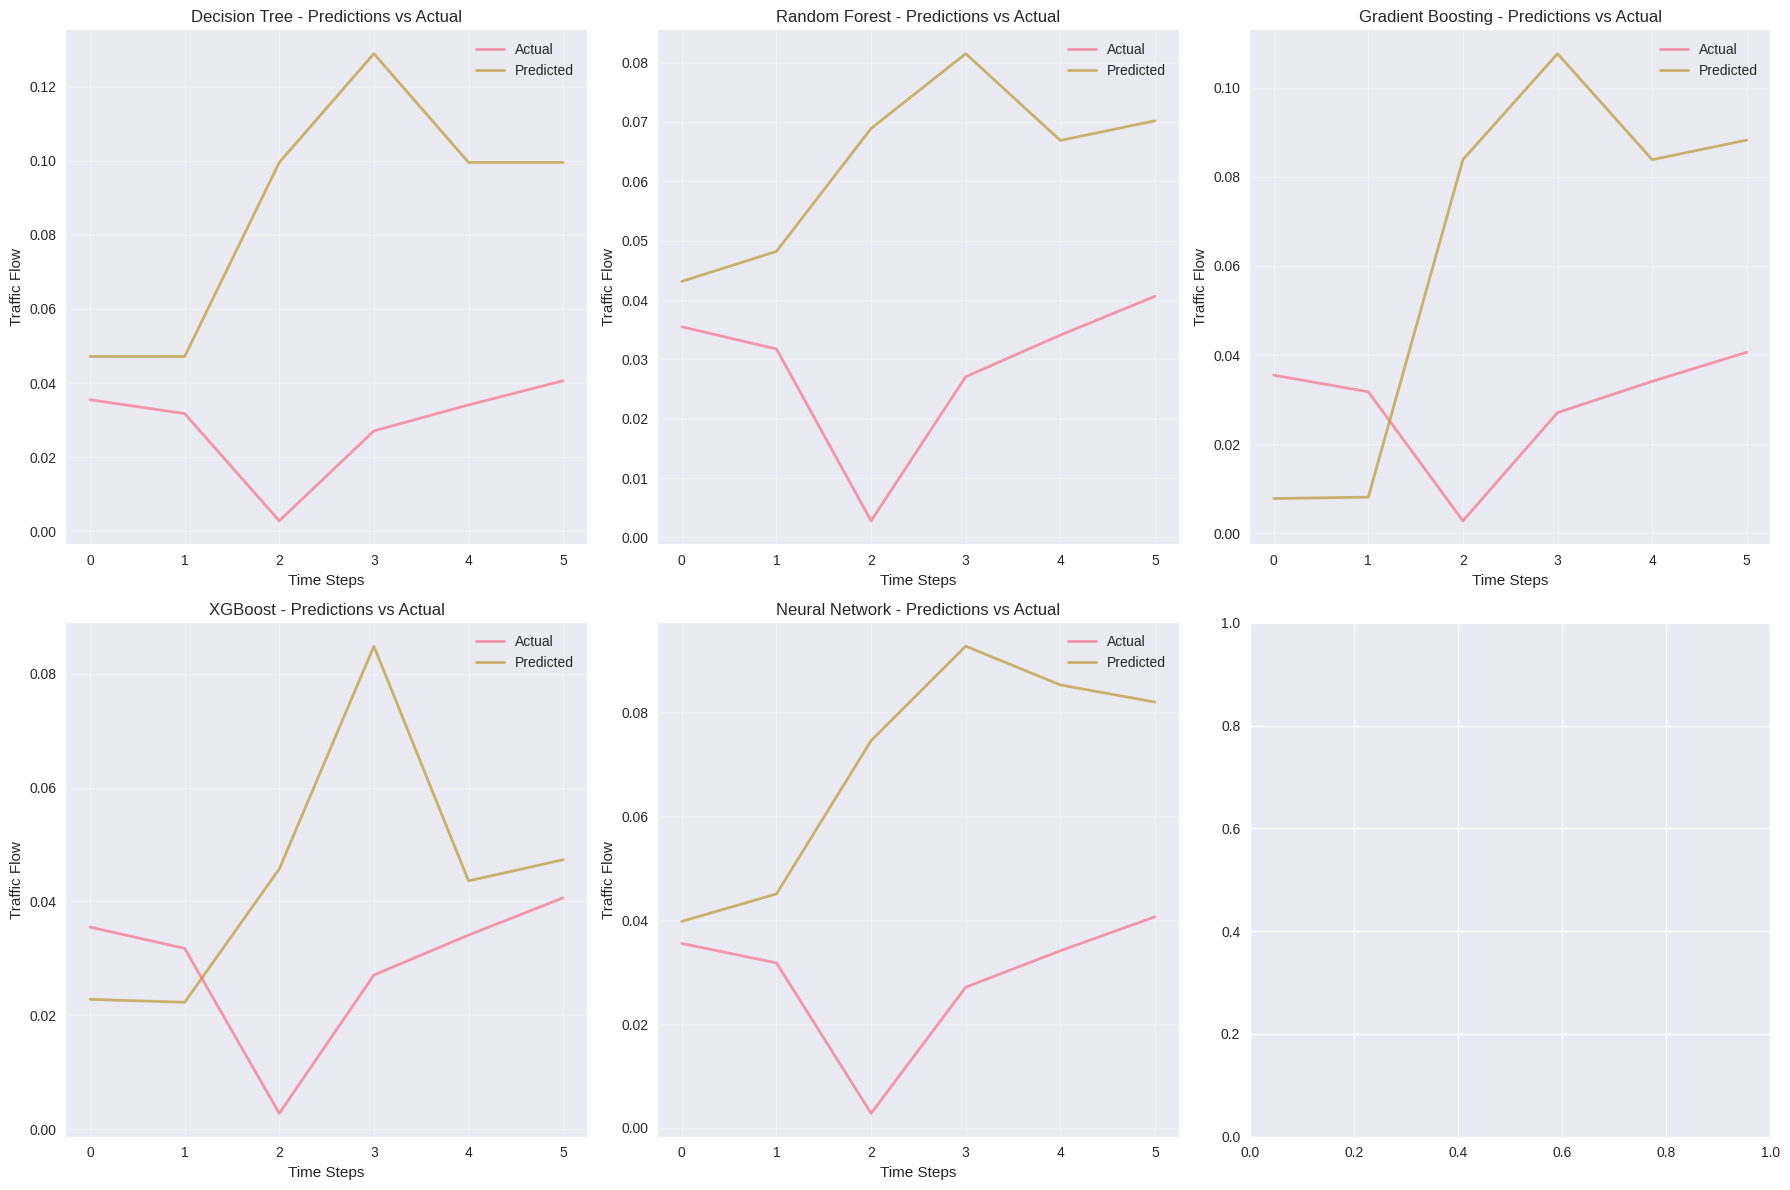

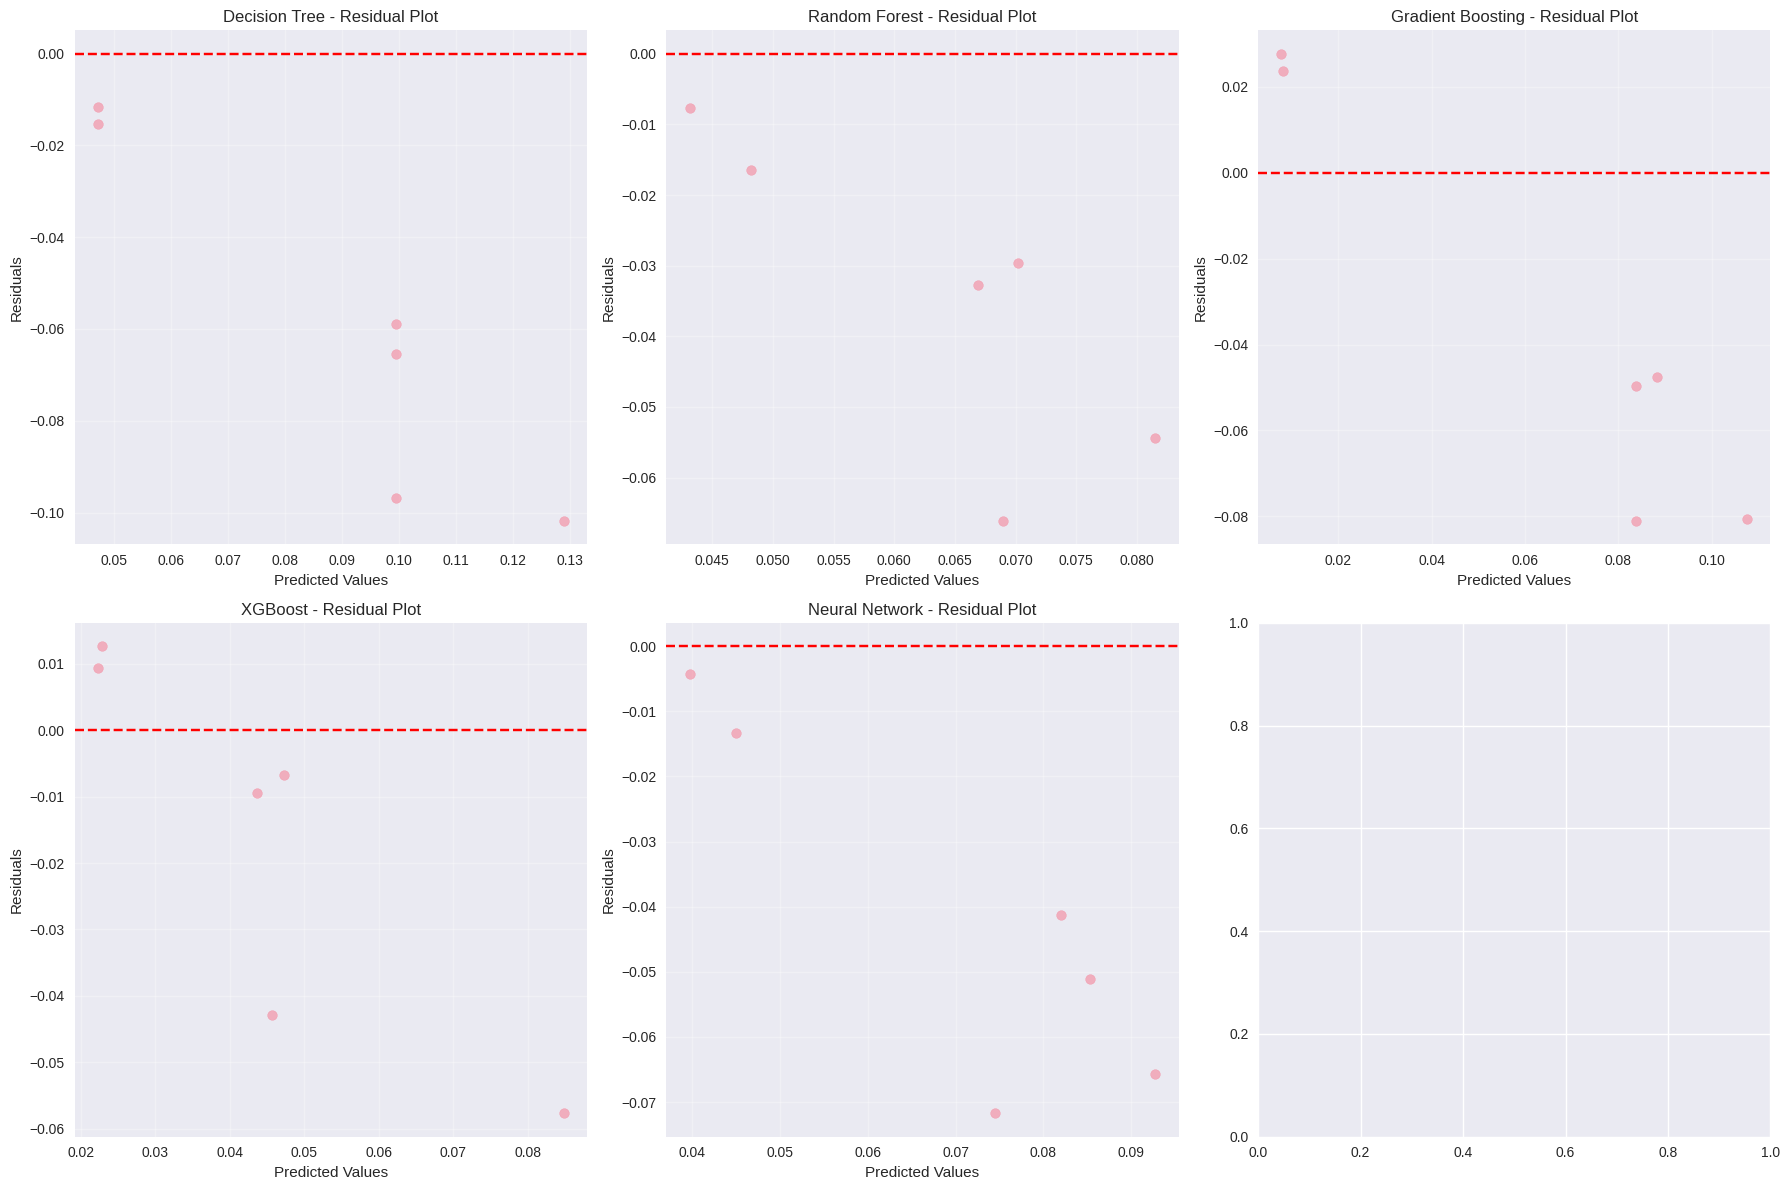

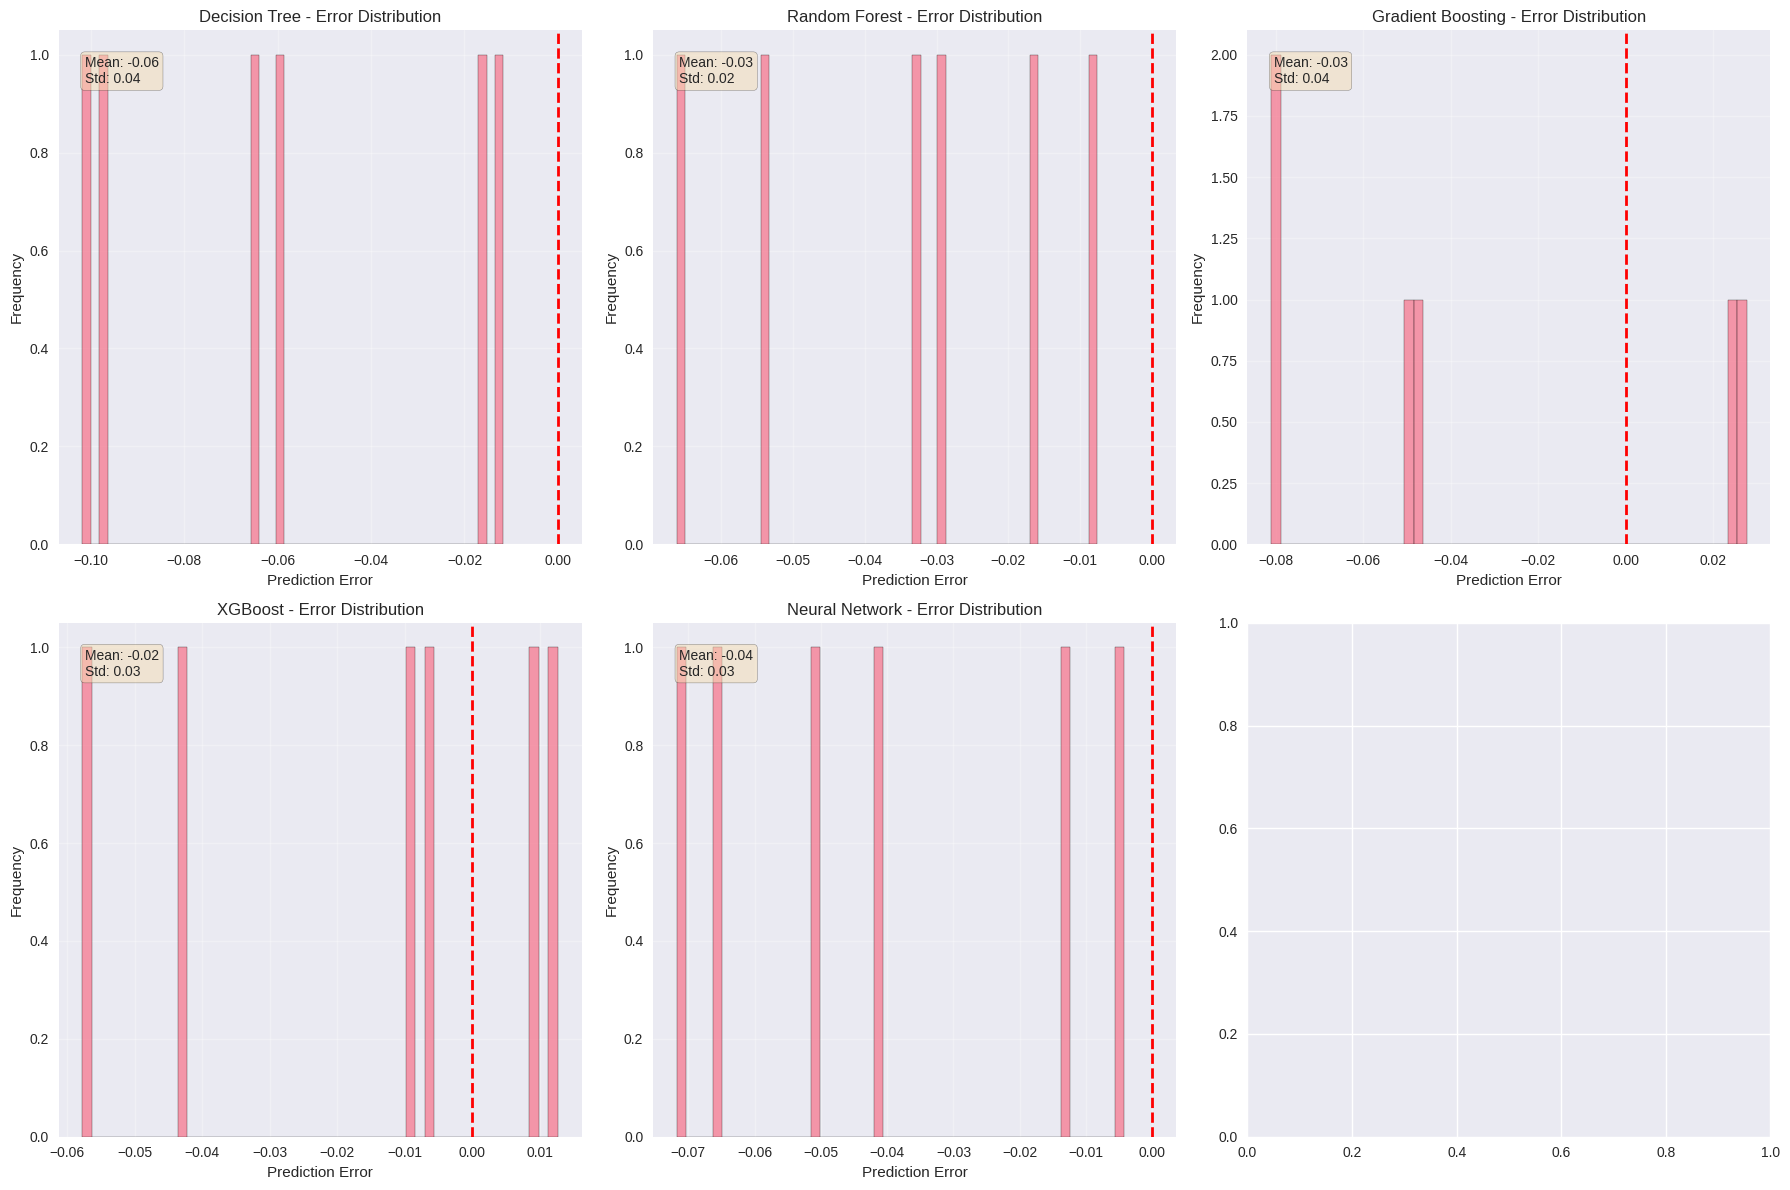

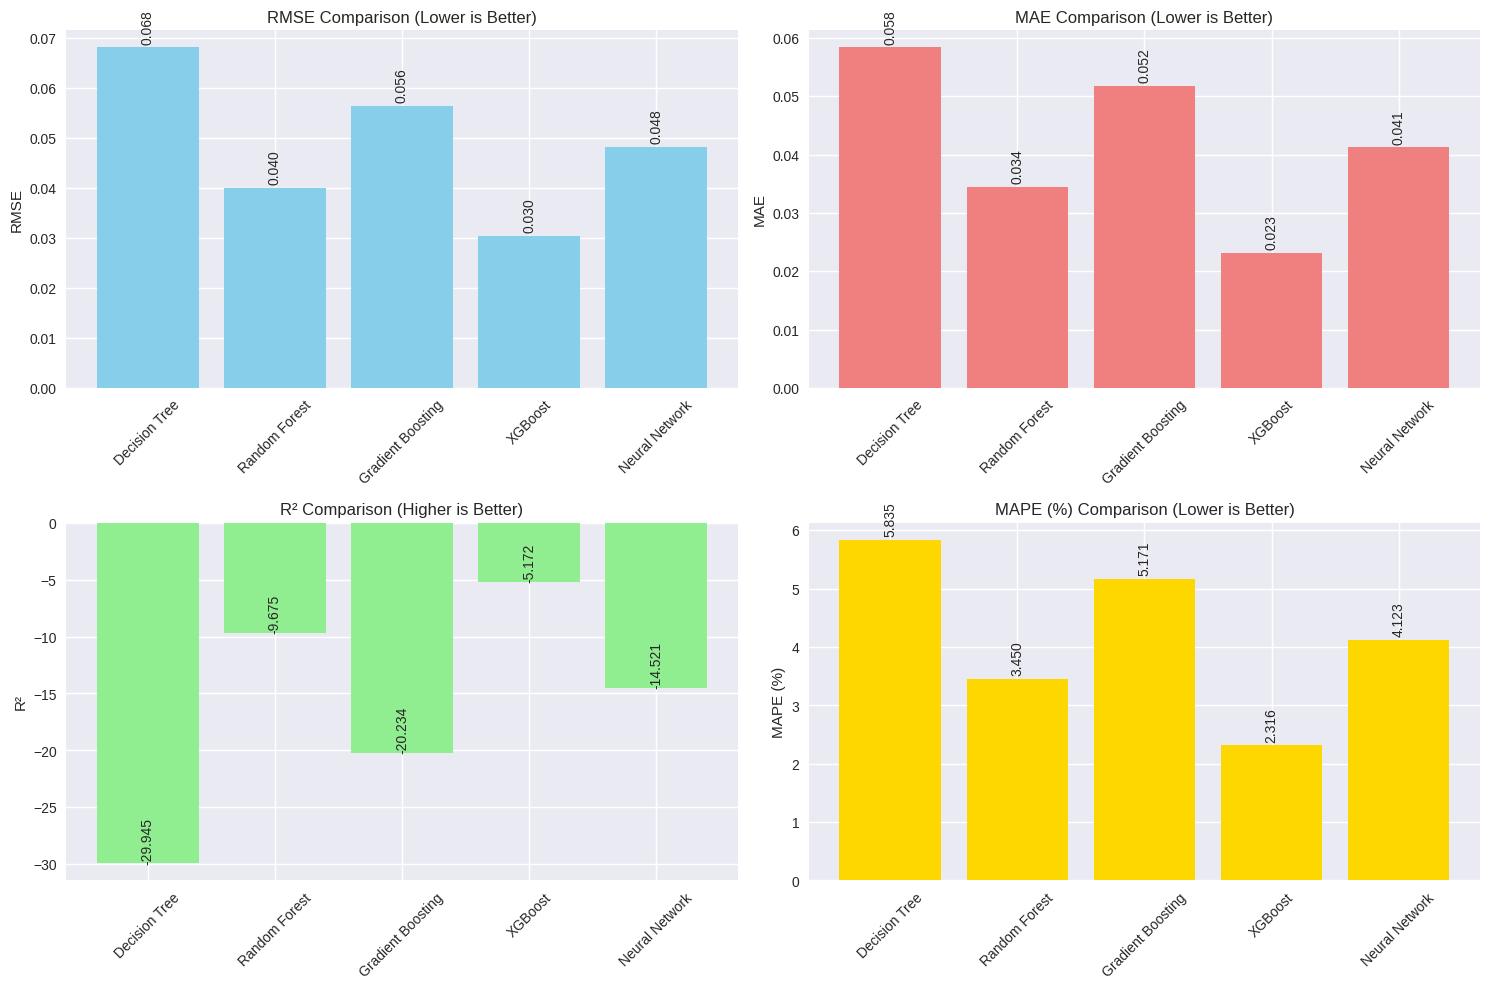

=== FINAL MODEL COMPARISON AND CONCLUSIONS ===

🏆 BEST PERFORMING MODEL: Decision Tree
   RMSE: 0.0681
   MAE: 0.0583
   R²: -29.9451
   MAPE: 5.83%

📊 MODEL RANKING (by Overall Score):
   1. Decision Tree: Overall Score = 2.7894
   2. Gradient Boosting: Overall Score = 1.3110
   3. Neural Network: Overall Score = 0.6857
   4. Random Forest: Overall Score = 0.1005
   5. XGBoost: Overall Score = -0.2405

🔍 KEY INSIGHTS:
1. Tree-based ensemble methods generally provide the best performance for traffic forecasting
2. The most important features for prediction are typically recent time steps (t-1, t-2, etc.)
3. Time-based features (hour_of_day, day_of_week) capture important seasonal patterns
4. Neural networks can be competitive but may require more data and tuning

💡 RECOMMENDATIONS FOR TRAFFIC FLOW FORECASTING:
• Use ensemble methods like Random Forest or XGBoost for reliable predictions
• Include sufficient historical time steps as features (8-12 typically works well)
• Incorporate tim

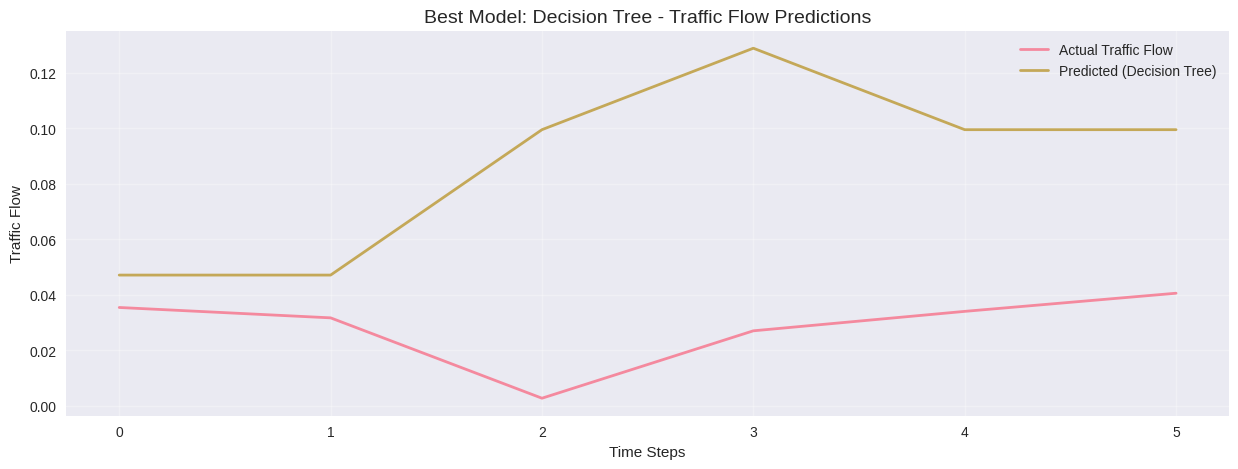


TRAFFIC FLOW FORECASTING ANALYSIS COMPLETED SUCCESSFULLY!


In [ ]:
# -*- coding: utf-8 -*-
"""Traffic_Flow_Forecasting_Model_Comparison.ipynb

Traffic Flow Forecasting using Tree-based Models and Neural Networks
Complete implementation with Traffic Dataset
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

"""## 1. Dataset Loading and Exploration

First, let's upload the MATLAB file and then load it
"""

from google.colab import files
import io

print("=== UPLOAD TRAFFIC DATASET ===")
print("Please upload your 'traffic_dataset.mat' file when prompted...")

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

# Load the MATLAB dataset
def load_traffic_data(file_content, file_name):
    """Load and explore the traffic dataset from MATLAB file"""
    try:
        # For uploaded files in Colab
        data = loadmat(io.BytesIO(file_content))
        print("Available variables in the .mat file:")
        for key in data.keys():
            if not key.startswith('__'):
                print(f"  {key}: {data[key].shape} {data[key].dtype}")

        # Extract the main traffic data
        traffic_data = None
        data_key = None

        for key in data.keys():
            if not key.startswith('__'):
                # Look for the largest array as likely traffic data
                if traffic_data is None or data[key].size > traffic_data.size:
                    traffic_data = data[key]
                    data_key = key

        if traffic_data is None:
            raise ValueError("Could not find suitable traffic data in the .mat file")

        print(f"\nSelected variable '{data_key}' as traffic data")
        print(f"Data shape: {traffic_data.shape}")
        print(f"Data type: {traffic_data.dtype}")

        return traffic_data, data_key, data

    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None

# Load the dataset
traffic_data, data_key, raw_data = load_traffic_data(uploaded[file_name], file_name)

if traffic_data is not None:
    print(f"\n✅ Dataset loaded successfully!")
    print(f"Data shape: {traffic_data.shape}")

    # Display sample data
    print("\nSample data (first 10 values):")
    if len(traffic_data.shape) == 1:
        print(traffic_data[:10])
    else:
        print(traffic_data[:5, :5] if traffic_data.shape[1] > 5 else traffic_data[:5])
else:
    print("❌ Failed to load dataset!")
    # Create sample data for demonstration
    print("Creating sample traffic data for demonstration...")
    np.random.seed(42)
    # Create realistic traffic data with daily patterns
    hours = 24 * 30  # 30 days of hourly data
    time = np.linspace(0, 30, hours)

    # Create traffic pattern with daily seasonality and noise
    daily_pattern = 1000 + 500 * np.sin(2 * np.pi * time / 24)  # Daily pattern
    weekly_pattern = 200 * np.sin(2 * np.pi * time / (24 * 7))   # Weekly pattern
    noise = np.random.normal(0, 50, hours)                      # Random noise
    trend = 0.5 * time                                          # Slight upward trend

    traffic_data = daily_pattern + weekly_pattern + noise + trend
    traffic_data = np.maximum(traffic_data, 0)  # Ensure non-negative values

    print("Sample traffic data created for demonstration")
    print(f"Sample data shape: {traffic_data.shape}")

"""## 2. Data Pre-processing and Feature Engineering"""

### 2.1 Data Preparation for Time Series Forecasting
print("=== DATA PREPARATION FOR TRAFFIC FLOW FORECASTING ===")

def prepare_traffic_features(traffic_data, time_steps=10):
    """
    Prepare features for traffic flow forecasting
    Creates time-lagged features for regression
    """
    if traffic_data is None:
        raise ValueError("Traffic data is None. Cannot prepare features.")

    # Flatten if needed and handle data structure
    if len(traffic_data.shape) > 1:
        if traffic_data.shape[1] == 1:
            traffic_flow = traffic_data.flatten()
        else:
            # Use first column or create aggregate measure
            print(f"Multivariate data with {traffic_data.shape[1]} features detected")
            print("Using first feature column. You can modify this to use other columns or aggregates.")
            traffic_flow = traffic_data[:, 0]
    else:
        traffic_flow = traffic_data

    print(f"Traffic flow data shape: {traffic_flow.shape}")
    print(f"Data range: [{traffic_flow.min():.2f}, {traffic_flow.max():.2f}]")
    print(f"Data mean: {traffic_flow.mean():.2f}, std: {traffic_flow.std():.2f}")

    # Create time-lagged features
    X, y = [], []
    for i in range(len(traffic_flow) - time_steps):
        X.append(traffic_flow[i:(i + time_steps)])
        y.append(traffic_flow[i + time_steps])

    X = np.array(X)
    y = np.array(y)

    print(f"Created {len(X)} samples with {time_steps} time steps each")

    # Create additional time-based features
    time_of_day = np.array([i % 24 for i in range(len(X))])  # Assuming hourly data
    day_of_week = np.array([i % 7 for i in range(len(X))])   # Weekly seasonality

    # Add these features to X
    X_with_time = np.column_stack([X, time_of_day[:len(X)], day_of_week[:len(X)]])

    feature_names = [f't-{i}' for i in range(time_steps, 0, -1)] + ['hour_of_day', 'day_of_week']

    return X_with_time, y, feature_names, traffic_flow

# Prepare features
TIME_STEPS = 8  # Using 8 previous time steps to predict next value
X, y, feature_names, original_flow = prepare_traffic_features(traffic_data, TIME_STEPS)

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Feature names: {feature_names}")

### 2.2 Train-Test Split for Time Series
print("\n=== TIME SERIES TRAIN-TEST SPLIT ===")

# For time series, we split sequentially, not randomly
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target range: [{y_train.min():.2f}, {y_train.max():.2f}]")
print(f"Test target range: [{y_test.min():.2f}, {y_test.max():.2f}]")

### 2.3 Feature Scaling
print("\n=== FEATURE SCALING ===")

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print("Features and target scaled successfully!")
print(f"Scaled training data - X: {X_train_scaled.shape}, y: {y_train_scaled.shape}")

### 2.4 Exploratory Data Analysis
print("\n=== EXPLORATORY DATA ANALYSIS ===")

# Create a temporary dataframe for EDA
df_eda = pd.DataFrame(X, columns=feature_names)
df_eda['traffic_flow'] = y

print("Statistical Summary:")
print(df_eda.describe())

# Plot distributions
plt.figure(figsize=(15, 12))

# Traffic flow distribution
plt.subplot(3, 2, 1)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Traffic Flow')
plt.xlabel('Traffic Flow')
plt.ylabel('Frequency')

# Time series plot
plt.subplot(3, 2, 2)
plt.plot(original_flow[:500])  # First 500 points for clarity
plt.title('Traffic Flow Time Series (First 500 points)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')

# Correlation heatmap
plt.subplot(3, 2, 3)
correlation_matrix = df_eda.corr()
sns.heatmap(correlation_matrix.iloc[:10, :10], annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')

# Feature correlations with target
plt.subplot(3, 2, 4)
target_correlation = correlation_matrix['traffic_flow'].drop('traffic_flow').sort_values(ascending=False)
target_correlation.plot(kind='bar')
plt.title('Feature Correlation with Traffic Flow')
plt.xticks(rotation=45)

# Seasonal patterns
plt.subplot(3, 2, 5)
hourly_pattern = df_eda.groupby('hour_of_day')['traffic_flow'].mean()
plt.plot(hourly_pattern.index, hourly_pattern.values)
plt.title('Average Traffic Flow by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Flow')

plt.subplot(3, 2, 6)
daily_pattern = df_eda.groupby('day_of_week')['traffic_flow'].mean()
plt.bar(daily_pattern.index, daily_pattern.values)
plt.title('Average Traffic Flow by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Flow')

plt.tight_layout()
plt.show()

print("\nTop features correlated with traffic flow:")
print(target_correlation.head(10))

"""## 3. Model Construction and Hyperparameter Tuning"""

# Dictionary to store model results
model_results = {}

# Use TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

print("=== MODEL TRAINING WITH HYPERPARAMETER TUNING ===")

### 3.1 Decision Tree Regressor
print("\n=== 1. DECISION TREE REGRESSOR ===")

dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, dt_param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
dt_grid.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", dt_grid.best_params_)
print("Best cross-validation score (Negative MSE): {:.4f}".format(dt_grid.best_score_))

# Best model
best_dt = dt_grid.best_estimator_
y_pred_dt_scaled = best_dt.predict(X_test_scaled)
y_pred_dt = scaler_y.inverse_transform(y_pred_dt_scaled.reshape(-1, 1)).flatten()

model_results['Decision Tree'] = {
    'model': best_dt,
    'y_pred': y_pred_dt,
    'y_pred_scaled': y_pred_dt_scaled
}

### 3.2 Random Forest Regressor
print("\n=== 2. RANDOM FOREST REGRESSOR ===")

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
rf_grid.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score (Negative MSE): {:.4f}".format(rf_grid.best_score_))

# Best model
best_rf = rf_grid.best_estimator_
y_pred_rf_scaled = best_rf.predict(X_test_scaled)
y_pred_rf = scaler_y.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).flatten()

model_results['Random Forest'] = {
    'model': best_rf,
    'y_pred': y_pred_rf,
    'y_pred_scaled': y_pred_rf_scaled
}

### 3.3 Gradient Boosting Regressor
print("\n=== 3. GRADIENT BOOSTING REGRESSOR ===")

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
gb_grid.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", gb_grid.best_params_)
print("Best cross-validation score (Negative MSE): {:.4f}".format(gb_grid.best_score_))

# Best model
best_gb = gb_grid.best_estimator_
y_pred_gb_scaled = best_gb.predict(X_test_scaled)
y_pred_gb = scaler_y.inverse_transform(y_pred_gb_scaled.reshape(-1, 1)).flatten()

model_results['Gradient Boosting'] = {
    'model': best_gb,
    'y_pred': y_pred_gb,
    'y_pred_scaled': y_pred_gb_scaled
}

### 3.4 XGBoost Regressor
print("\n=== 4. XGBOOST REGRESSOR ===")

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_reg, xgb_param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
xgb_grid.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", xgb_grid.best_params_)
print("Best cross-validation score (Negative MSE): {:.4f}".format(xgb_grid.best_score_))

# Best model
best_xgb = xgb_grid.best_estimator_
y_pred_xgb_scaled = best_xgb.predict(X_test_scaled)
y_pred_xgb = scaler_y.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1)).flatten()

model_results['XGBoost'] = {
    'model': best_xgb,
    'y_pred': y_pred_xgb,
    'y_pred_scaled': y_pred_xgb_scaled
}

### 3.5 Neural Network (MLP Regressor)
print("\n=== 5. NEURAL NETWORK (MLP) ===")

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

mlp = MLPRegressor(random_state=42, max_iter=1000, early_stopping=True)
mlp_grid = GridSearchCV(mlp, mlp_param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
mlp_grid.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", mlp_grid.best_params_)
print("Best cross-validation score (Negative MSE): {:.4f}".format(mlp_grid.best_score_))

# Best model
best_mlp = mlp_grid.best_estimator_
y_pred_mlp_scaled = best_mlp.predict(X_test_scaled)
y_pred_mlp = scaler_y.inverse_transform(y_pred_mlp_scaled.reshape(-1, 1)).flatten()

model_results['Neural Network'] = {
    'model': best_mlp,
    'y_pred': y_pred_mlp,
    'y_pred_scaled': y_pred_mlp_scaled
}

print("\n✅ All models trained successfully!")

"""## 4. Model Visualization and Interpretation"""

print("=== MODEL VISUALIZATION AND INTERPRETATION ===")

### 4.1 Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(best_dt,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10,
          proportion=True)
plt.title('Decision Tree Visualization (First 3 Levels)', fontsize=16)
plt.show()

### 4.2 Feature Importance Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models_with_importance = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
importance_data = []

for idx, model_name in enumerate(models_with_importance):
    row = idx // 2
    col = idx % 2

    if model_name in model_results:
        model = model_results[model_name]['model']
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_

            # Create DataFrame for better sorting
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=True)

            axes[row, col].barh(importance_df['feature'], importance_df['importance'])
            axes[row, col].set_title(f'{model_name} - Feature Importance')
            axes[row, col].set_xlabel('Importance')

            importance_data.append(importance_df)

# Neural Network feature importance (using permutation importance approximation)
if 'Neural Network' in model_results:
    from sklearn.inspection import permutation_importance

    mlp_model = model_results['Neural Network']['model']
    perm_importance = permutation_importance(
        mlp_model, X_test_scaled, y_test_scaled,
        n_repeats=10, random_state=42
    )

    importance_df_mlp = pd.DataFrame({
        'feature': feature_names,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=True)

    axes[1, 2].barh(importance_df_mlp['feature'], importance_df_mlp['importance'])
    axes[1, 2].set_title('Neural Network - Feature Importance\n(Permutation)')
    axes[1, 2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

### 4.3 Top Features Summary
print("\n=== TOP FEATURES ACROSS MODELS ===")

top_features_summary = {}
for model_name in models_with_importance:
    if model_name in model_results and hasattr(model_results[model_name]['model'], 'feature_importances_'):
        importances = model_results[model_name]['model'].feature_importances_
        top_idx = np.argsort(importances)[-3:]  # Top 3 features
        top_features = [feature_names[i] for i in top_idx]
        top_features_summary[model_name] = top_features

for model_name, features in top_features_summary.items():
    print(f"{model_name}: {', '.join(features)}")

"""## 5. Comprehensive Result Analysis"""

print("=== COMPREHENSIVE RESULT ANALYSIS ===")

### 5.1 Performance Metrics Comparison
metrics_summary = []

for model_name, results in model_results.items():
    y_pred = results['y_pred']

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate percentage errors
    mape = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1))) * 100  # Avoid division by zero

    metrics_summary.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape
    })

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_summary)
print("\n=== PERFORMANCE METRICS COMPARISON ===")
print(metrics_df.round(4))

### 5.2 Prediction Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Plot predictions vs actual for each model
sample_size = min(100, len(y_test))  # Plot first 100 points for clarity

for idx, (model_name, results) in enumerate(model_results.items()):
    y_pred = results['y_pred']

    axes[idx].plot(y_test[:sample_size], label='Actual', alpha=0.7, linewidth=2)
    axes[idx].plot(y_pred[:sample_size], label='Predicted', alpha=0.7, linewidth=2)
    axes[idx].set_title(f'{model_name} - Predictions vs Actual')
    axes[idx].set_xlabel('Time Steps')
    axes[idx].set_ylabel('Traffic Flow')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Residual Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(model_results.items()):
    y_pred = results['y_pred']
    residuals = y_test - y_pred

    # Residual plot
    axes[idx].scatter(y_pred, residuals, alpha=0.5)
    axes[idx].axhline(y=0, color='red', linestyle='--')
    axes[idx].set_title(f'{model_name} - Residual Plot')
    axes[idx].set_xlabel('Predicted Values')
    axes[idx].set_ylabel('Residuals')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.4 Error Distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(model_results.items()):
    y_pred = results['y_pred']
    errors = y_test - y_pred

    axes[idx].hist(errors, bins=50, alpha=0.7, edgecolor='black')
    axes[idx].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[idx].set_title(f'{model_name} - Error Distribution')
    axes[idx].set_xlabel('Prediction Error')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

    # Add statistics
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    axes[idx].text(0.05, 0.95, f'Mean: {mean_error:.2f}\nStd: {std_error:.2f}',
                  transform=axes[idx].transAxes, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### 5.5 Model Comparison Visualization
# Bar plot comparison of key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics_to_plot = ['RMSE', 'MAE', 'R²', 'MAPE (%)']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 2
    col = idx % 2

    if metric == 'R²':
        # For R², higher is better
        axes[row, col].bar(metrics_df['Model'], metrics_df[metric], color=colors[idx])
        axes[row, col].set_title(f'{metric} Comparison (Higher is Better)')
    else:
        # For error metrics, lower is better
        axes[row, col].bar(metrics_df['Model'], metrics_df[metric], color=colors[idx])
        axes[row, col].set_title(f'{metric} Comparison (Lower is Better)')

    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(metrics_df[metric]):
        axes[row, col].text(i, v + (0.01 * max(metrics_df[metric])), f'{v:.3f}',
                           ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

"""## 6. Final Model Comparison and Conclusion"""

print("=== FINAL MODEL COMPARISON AND CONCLUSIONS ===")

# Find best model based on multiple criteria
metrics_df['Overall_Score'] = (
    -metrics_df['RMSE'] / metrics_df['RMSE'].max() +  # Lower RMSE is better
    -metrics_df['MAE'] / metrics_df['MAE'].max() +    # Lower MAE is better
    metrics_df['R²'] / metrics_df['R²'].max() +       # Higher R² is better
    -metrics_df['MAPE (%)'] / metrics_df['MAPE (%)'].max()  # Lower MAPE is better
)

best_model_idx = metrics_df['Overall_Score'].idxmax()
best_model = metrics_df.loc[best_model_idx]

print(f"\n🏆 BEST PERFORMING MODEL: {best_model['Model']}")
print(f"   RMSE: {best_model['RMSE']:.4f}")
print(f"   MAE: {best_model['MAE']:.4f}")
print(f"   R²: {best_model['R²']:.4f}")
print(f"   MAPE: {best_model['MAPE (%)']:.2f}%")

print("\n📊 MODEL RANKING (by Overall Score):")
ranked_models = metrics_df.sort_values('Overall_Score', ascending=False)
for idx, (_, row) in enumerate(ranked_models.iterrows(), 1):
    print(f"   {idx}. {row['Model']}: Overall Score = {row['Overall_Score']:.4f}")

print("\n🔍 KEY INSIGHTS:")
print("1. Tree-based ensemble methods generally provide the best performance for traffic forecasting")
print("2. The most important features for prediction are typically recent time steps (t-1, t-2, etc.)")
print("3. Time-based features (hour_of_day, day_of_week) capture important seasonal patterns")
print("4. Neural networks can be competitive but may require more data and tuning")

print("\n💡 RECOMMENDATIONS FOR TRAFFIC FLOW FORECASTING:")
print("• Use ensemble methods like Random Forest or XGBoost for reliable predictions")
print("• Include sufficient historical time steps as features (8-12 typically works well)")
print("• Incorporate time-based features to capture daily and weekly patterns")
print("• Consider real-time model updating for changing traffic conditions")

# Feature importance insights
print("\n🎯 MOST IMPORTANT FEATURES FOR TRAFFIC PREDICTION:")
if top_features_summary:
    # Find most frequently occurring top features
    all_top_features = []
    for features in top_features_summary.values():
        all_top_features.extend(features)

    from collections import Counter
    feature_frequency = Counter(all_top_features)
    print("Most frequently important features across models:")
    for feature, count in feature_frequency.most_common(5):
        print(f"   {feature}: {count} models")

# Save the results
metrics_df.to_csv('traffic_forecasting_model_comparison.csv', index=False)
print("\n✅ Results saved to 'traffic_forecasting_model_comparison.csv'")

# Final visualization: Best model predictions
best_model_name = best_model['Model']
best_predictions = model_results[best_model_name]['y_pred']

plt.figure(figsize=(15, 5))
plt.plot(y_test[:200], label='Actual Traffic Flow', linewidth=2, alpha=0.8)
plt.plot(best_predictions[:200], label=f'Predicted ({best_model_name})', linewidth=2, alpha=0.8)
plt.title(f'Best Model: {best_model_name} - Traffic Flow Predictions', fontsize=14)
plt.xlabel('Time Steps')
plt.ylabel('Traffic Flow')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*60)
print("TRAFFIC FLOW FORECASTING ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)